# **Prediksi Resiko Stunting di Sulawesi Tenggara Berdasarkan Faktor Gizi dan Sosial Menggunakan Algoritma K-Nearest Neighbors Classifier (KNN)**

Kelompok 2
1. Nirmala (E1E123012)
2. Rahmah Yuniati (E1E123074)
3. Muh. Arif Rahman Gani (E1E123040)

# **Menentukan Pertanyaan Bisnis atau Analisis**
1. Bagaimana pengaruh tingkat akses terhadap sanitasi layak terhadap prevalensi stunting pada balita di setiap kabupaten/kota di Provinsi Sulawesi Tenggara?

2. Bagaimana hubungan antara persentase bayi baru lahir yang mendapatkan ASI eksklusif dengan penurunan prevalensi stunting di kabupaten/kota di Provinsi Sulawesi Tenggara?

3. Bagaimana pengaruh tingkat kemiskinan terhadap prevalensi stunting di kabupaten/kota di Provinsi Sulawesi Tenggara?

4. Bagaimana hubungan antara rata-rata lama sekolah sebagai indikator pendidikan dengan tingkat stunting pada balita di Provinsi Sulawesi Tenggara?

5. Bagaimana sebaran data dan hubungan antar indikator gizi, sanitasi, dan sosial ekonomi terhadap kejadian stunting di wilayah Sulawesi Tenggara?



# **Import Library yang Digunakan**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import joblib
import difflib
from google.colab import files
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# **Data Wrangling**

# Gathering Data

In [134]:
df_sanitasi = pd.read_csv("/content/Akses Terhadap Sanitasi Layak.csv", delimiter=';')
df_asi = pd.read_excel("/content/Pemberian ASI Eksklusif.xlsx")
df_gizi = pd.read_excel("/content/Status Gizi Balita.xlsx")
df_penduduk = pd.read_csv("/content/Jumlah dan Presentase Penduduk Miskin.csv", delimiter=';')
df_sekolah = pd.read_csv("/content/Rata-rata Lama Sekolah.csv", delimiter=';')

In [135]:
df_sanitasi.head()

,Kabupaten/Kota,Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak
0,BUTON,80.33
1,MUNA,85.31
2,KONAWE,90.50
3,KOLAKA,93.56
4,KONAWE SELATAN,92.36


In [136]:
df_asi.head()

,Kabupaten / Kota,Bayi Baru Lahir (Jumlah Mendapat IMD),Bayi Baru Lahir (Persentase (%) Mendapat IMD),Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif),Bayi Usia <6 Bulan (Persentase (%) Diberi ASI Eksklusif)
0,BUTON,1734,885,626,526
1,MUNA,2734,972,926,591
2,KONAWE,2781,860,1038,583
3,KOLAKA,3221,939,1149,675
4,KONAWE SELATAN,4021,952,2340,621


In [137]:
df_gizi.head()

,Kabupaten / Kota,Jumlah Balita Yang Ditimbang,Jumlah Balita Berat Badan Kurang (BB/U),Persentase (%) Balita Berat Badan Kurang (BB/U),Jumlah Balita Yang Diukur Tinggi Badan,Jumlah Balita Pendek (TB/U),Persentase (%) Balita Pendek (TB/U),Jumlah Balita Yang Diukur,Jumlah Balita Gizi Kurang (BB/TB : < -2 sd -3 SD),Persentase (%) Balita Gizi Kurang (BB/TB : < -2 sd -3 SD),Jumlah Balita Gizi Buruk (BB/TB : < -3 SD),Persentase Balita Gizi Buruk (BB/TB : < -3 SD)
0,BUTON,9822,2323,237,9822,2094,213,9820,891,91,101,10
1,MUNA,14278,1261,88,14250,1779,125,14256,493,35,41,3
2,KONAWE,15674,783,50,15663,502,32,15664,693,44,7,0
3,KOLAKA,16084,996,62,16726,1510,90,16726,376,22,37,2
4,KONAWE SELATAN,21774,1844,85,21777,2167,100,21780,737,34,12,1


In [138]:
df_penduduk.head()

,Kabupaten/Kota,Garis Kemiskinan,Jumlah Penduduk Miskin,Persentase Penduduk Miskin
0,BUTON,313831,14.41,13.99
1,MUNA,434750,31.82,13.78
2,KONAWE,425029,33.99,13.25
3,KOLAKA,477917,33.20,11.67
4,KONAWE SELATAN,354696,37.09,11.20


In [139]:
df_sekolah.head()

,Provinsi/Kabupaten/Kota,Perempuan
0,BUTON,7.94
1,MUNA,8.31
2,KONAWE,9.43
3,KOLAKA,9.33
4,KONAWE SELATAN,8.33


# **Insight**

1. Akses Sanitasi Layak
Sebagian besar kabupaten/kota memiliki akses sanitasi layak di atas 80%, namun Buton relatif rendah (80,33%), menandakan perlunya peningkatan akses sanitasi terutama di wilayah tersebut.

2. Cakupan IMD dan ASI Eksklusif
Persentase bayi yang mendapat IMD dan ASI eksklusif bervariasi. Konawe Selatan memiliki jumlah bayi yang mendapat ASI eksklusif tertinggi secara jumlah, namun persentasenya masih perlu ditingkatkan.

3. Status Gizi Balita
Tingkat gizi kurang dan gizi buruk balita berbeda antar kabupaten. Buton memiliki persentase gizi buruk tertinggi (10%), sedangkan Konawe Selatan memiliki balita pendek tertinggi (100%), menunjukkan perlunya intervensi gizi spesifik per wilayah.

4. Kemiskinan dan Distribusi Populasi
Persentase penduduk miskin relatif rendah (11–14%) meski garis kemiskinan bervariasi, menandakan ketimpangan ekonomi atau distribusi penduduk yang berbeda antar kabupaten.


# **Assessing Data**

In [140]:
df_sanitasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Kabupaten/Kota                                            17 non-null     object 
 1   Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 404.0+ bytes


# Cek Missing Value

In [141]:
df_sanitasi.isna().sum()

,0
Kabupaten/Kota,0
Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak,0


# Cek Duplicate Data

In [142]:
df_sanitasi.duplicated().sum()

np.int64(0)

# Statistik Descriptif

In [143]:
df_sanitasi.describe()

,Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak
count,17.000000
mean,85.840588
std,7.957126
min,71.640000
25%,82.740000
50%,85.490000
75%,92.890000
max,96.990000


In [144]:
df_asi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Kabupaten / Kota                                          17 non-null     object
 1   Bayi Baru Lahir (Jumlah Mendapat IMD)                     17 non-null     int64 
 2   Bayi Baru Lahir (Persentase (%) Mendapat IMD)             17 non-null     int64 
 3   Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif)          17 non-null     int64 
 4   Bayi Usia <6 Bulan (Persentase (%) Diberi ASI Eksklusif)  17 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 812.0+ bytes


In [145]:
df_asi.isna().sum()

,0
Kabupaten / Kota,0
Bayi Baru Lahir (Jumlah Mendapat IMD),0
Bayi Baru Lahir (Persentase (%) Mendapat IMD),0
Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif),0
Bayi Usia <6 Bulan (Persentase (%) Diberi ASI Eksklusif),0


In [146]:
df_asi.duplicated().sum()

np.int64(0)

In [147]:
df_asi.describe()

,Bayi Baru Lahir (Jumlah Mendapat IMD),Bayi Baru Lahir (Persentase (%) Mendapat IMD),Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif),Bayi Usia <6 Bulan (Persentase (%) Diberi ASI Eksklusif)
count,17.000000,17.000000,17.000000,17.000000
mean,2162.176471,933.588235,957.705882,584.352941
std,1388.952719,56.901295,837.263904,149.290380
min,526.000000,807.000000,164.000000,167.000000
25%,1379.000000,931.000000,415.000000,526.000000
50%,1734.000000,947.000000,661.000000,621.000000
75%,2734.000000,971.000000,1038.000000,658.000000
max,6311.000000,1000.000000,3429.000000,820.000000


In [148]:
df_gizi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 12 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Kabupaten / Kota                                           17 non-null     object
 1   Jumlah Balita Yang Ditimbang                               17 non-null     int64 
 2   Jumlah Balita Berat Badan Kurang (BB/U)                    17 non-null     int64 
 3   Persentase (%) Balita Berat Badan Kurang (BB/U)            17 non-null     int64 
 4   Jumlah Balita Yang Diukur Tinggi Badan                     17 non-null     int64 
 5   Jumlah Balita Pendek (TB/U)                                17 non-null     int64 
 6   Persentase (%) Balita Pendek (TB/U)                        17 non-null     int64 
 7   Jumlah Balita Yang Diukur                                  17 non-null     int64 
 8   Jumlah Balita Gizi Kur

In [149]:
df_gizi.isna().sum()

,0
Kabupaten / Kota,0
Jumlah Balita Yang Ditimbang,0
Jumlah Balita Berat Badan Kurang (BB/U),0
Persentase (%) Balita Berat Badan Kurang (BB/U),0
Jumlah Balita Yang Diukur Tinggi Badan,0
Jumlah Balita Pendek (TB/U),0
Persentase (%) Balita Pendek (TB/U),0
Jumlah Balita Yang Diukur,0
Jumlah Balita Gizi Kurang (BB/TB : < -2 sd -3 SD),0
Persentase (%) Balita Gizi Kurang (BB/TB : < -2 sd -3 SD),0


In [150]:
df_gizi.duplicated().sum()

np.int64(0)

In [151]:
df_gizi.describe()

,Jumlah Balita Yang Ditimbang,Jumlah Balita Berat Badan Kurang (BB/U),Persentase (%) Balita Berat Badan Kurang (BB/U),Jumlah Balita Yang Diukur Tinggi Badan,Jumlah Balita Pendek (TB/U),Persentase (%) Balita Pendek (TB/U),Jumlah Balita Yang Diukur,Jumlah Balita Gizi Kurang (BB/TB : < -2 sd -3 SD),Persentase (%) Balita Gizi Kurang (BB/TB : < -2 sd -3 SD),Jumlah Balita Gizi Buruk (BB/TB : < -3 SD),Persentase Balita Gizi Buruk (BB/TB : < -3 SD)
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,10530.470588,1201.000000,155.529412,10598.411765,1010.529412,107.411765,9055.176471,414.882353,104.000000,58.764706,14.352941
std,6450.370407,1097.417138,223.983570,6474.801262,671.958343,60.108297,5474.305221,217.784550,231.810267,106.831953,31.739056
min,2237.000000,267.000000,25.000000,2237.000000,191.000000,21.000000,312.000000,105.000000,21.000000,4.000000,0.000000
25%,5995.000000,577.000000,62.000000,6061.000000,410.000000,54.000000,5780.000000,254.000000,35.000000,10.000000,1.000000
50%,8879.000000,918.000000,96.000000,8943.000000,849.000000,100.000000,8879.000000,329.000000,46.000000,13.000000,2.000000
75%,14278.000000,1291.000000,135.000000,14250.000000,1510.000000,144.000000,10012.000000,542.000000,61.000000,39.000000,6.000000
max,26617.000000,4913.000000,1001.000000,26617.000000,2167.000000,213.000000,21780.000000,891.000000,1000.000000,390.000000,125.000000


In [152]:
df_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Kabupaten/Kota               17 non-null     object 
 1   Garis Kemiskinan             17 non-null     int64  
 2   Jumlah Penduduk Miskin       17 non-null     float64
 3   Persentase Penduduk Miskin   17 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 676.0+ bytes


In [153]:
df_penduduk.isna().sum()

,0
Kabupaten/Kota,0
Garis Kemiskinan,0
Jumlah Penduduk Miskin,0
Persentase Penduduk Miskin,0


In [154]:
df_penduduk.duplicated().sum()

np.int64(0)

In [155]:
df_penduduk.describe()

,Garis Kemiskinan,Jumlah Penduduk Miskin,Persentase Penduduk Miskin
count,17.000000,17.000000,17.000000
mean,416119.411765,18.806471,12.500000
std,71519.336871,9.780728,2.858754
min,300991.000000,5.360000,4.230000
25%,355748.000000,11.500000,11.670000
50%,423183.000000,14.930000,13.510000
75%,434750.000000,22.070000,14.090000
max,529192.000000,37.090000,15.540000


In [156]:
df_sekolah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Provinsi/Kabupaten/Kota  17 non-null     object 
 1   Perempuan                17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 404.0+ bytes


In [157]:
df_sekolah.isna().sum()

,0
Provinsi/Kabupaten/Kota,0
Perempuan,0


In [158]:
df_sekolah.duplicated().sum()

np.int64(0)

In [159]:
df_sekolah.describe()

,Perempuan
count,17.000000
mean,8.695294
std,1.331475
min,6.370000
25%,8.030000
50%,8.350000
75%,9.180000
max,12.130000


# **Cleaning Data**

# Cek Outlier

In [160]:
def count_outliers_iqr(df, columns):
    outlier_summary = []
    for col in columns:
        if np.issubdtype(df[col].dtype, np.number):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower) | (df[col] > upper)]
            outlier_summary.append({
                "Kolom": col,
                "Jumlah Outlier": len(outliers),
                "Persentase (%)": round(len(outliers) / len(df) * 100, 2)
            })
    return pd.DataFrame(outlier_summary)

print(" 1. Akses Terhadap Sanitasi Layak ")
display(count_outliers_iqr(df_sanitasi, df_sanitasi.select_dtypes(include=[np.number]).columns))

print("\n 2. Pemberian ASI Eksklusif ")
display(count_outliers_iqr(df_asi, df_asi.select_dtypes(include=[np.number]).columns))

print("\n 3️. Status Gizi Balita ")
display(count_outliers_iqr(df_gizi, df_gizi.select_dtypes(include=[np.number]).columns))

print("\n 4️. Penduduk Miskin")
display(count_outliers_iqr(df_penduduk, df_penduduk.select_dtypes(include=[np.number]).columns))

print("\n 5️. Rata-rata Lama Sekolah ")
display(count_outliers_iqr(df_sekolah, df_sekolah.select_dtypes(include=[np.number]).columns))


 1. Akses Terhadap Sanitasi Layak 


,Kolom,Jumlah Outlier,Persentase (%)
0,Rumah Tangga yang Memiliki Akses Terhadap Sani...,0,0.0



 2. Pemberian ASI Eksklusif 


,Kolom,Jumlah Outlier,Persentase (%)
0,Bayi Baru Lahir (Jumlah Mendapat IMD),1,5.88
1,Bayi Baru Lahir (Persentase (%) Mendapat IMD),3,17.65
2,Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif),2,11.76
3,Bayi Usia <6 Bulan (Persentase (%) Diberi ASI ...,1,5.88



 3️. Status Gizi Balita 


,Kolom,Jumlah Outlier,Persentase (%)
0,Jumlah Balita Yang Ditimbang,0,0.00
1,Jumlah Balita Berat Badan Kurang (BB/U),1,5.88
2,Persentase (%) Balita Berat Badan Kurang (BB/U),1,5.88
3,Jumlah Balita Yang Diukur Tinggi Badan,1,5.88
4,Jumlah Balita Pendek (TB/U),0,0.00
5,Persentase (%) Balita Pendek (TB/U),0,0.00
6,Jumlah Balita Yang Diukur,2,11.76
7,Jumlah Balita Gizi Kurang (BB/TB : < -2 sd -3 SD),0,0.00
8,Persentase (%) Balita Gizi Kurang (BB/TB : < -...,1,5.88
9,Jumlah Balita Gizi Buruk (BB/TB : < -3 SD),3,17.65



 4️. Penduduk Miskin


,Kolom,Jumlah Outlier,Persentase (%)
0,Garis Kemiskinan,0,0.00
1,Jumlah Penduduk Miskin,0,0.00
2,Persentase Penduduk Miskin,2,11.76



 5️. Rata-rata Lama Sekolah 


,Kolom,Jumlah Outlier,Persentase (%)
0,Perempuan,1,5.88


# Handling Outlier

 1️. Akses Terhadap Sanitasi Layak 


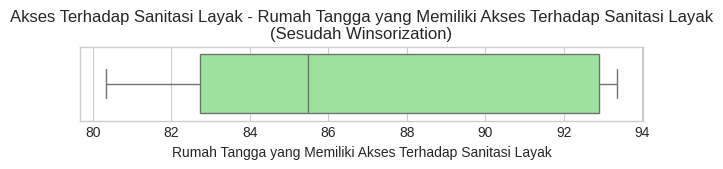


 2️. Pemberian ASI Eksklusif 


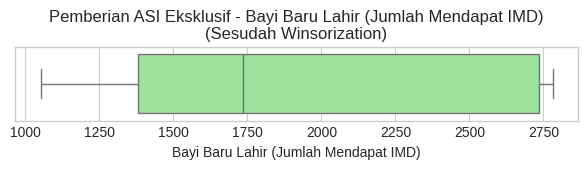

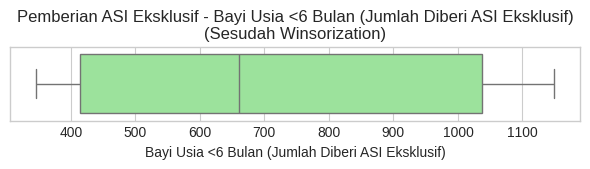


 3️. Status Gizi Balita 


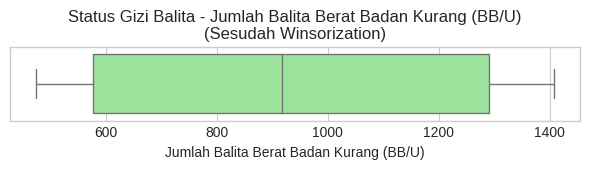

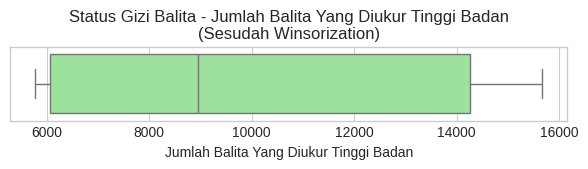

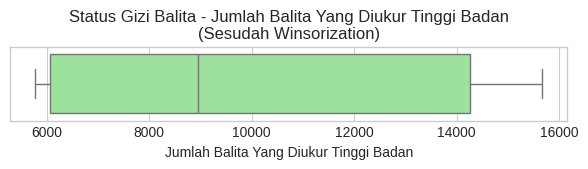

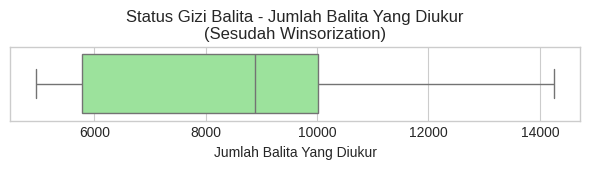

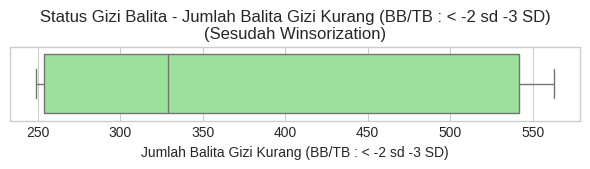

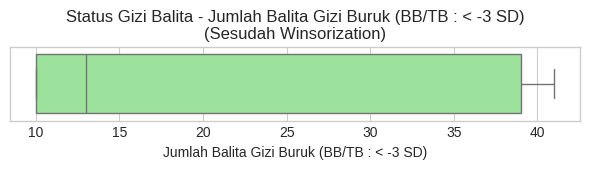

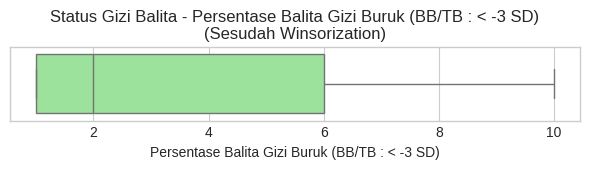


 4️. Penduduk Miskin 


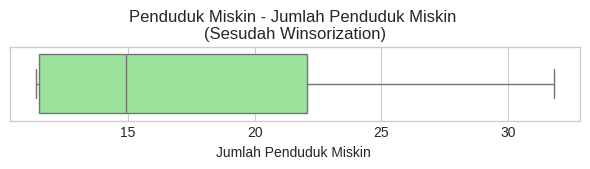

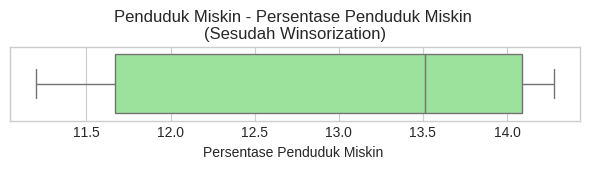


 5️. Rata-rata Lama Sekolah 


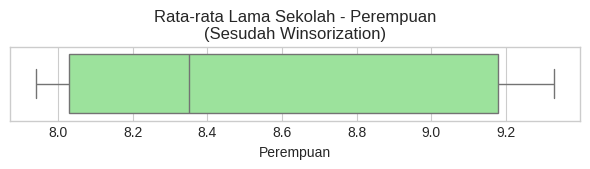

In [161]:
def winsorize_selected_columns(df, selected_cols, limits=(0.2, 0.2)):
    df_copy = df.copy()
    for col in selected_cols:
        if col in df_copy.columns and np.issubdtype(df_copy[col].dtype, np.number):
            df_copy[col] = winsorize(df_copy[col], limits=limits)
    return df_copy


def match_columns(df, possible_names):
    matched = []
    for name in df.columns:
        cleaned = re.sub(r'\s+', '', name.lower())
        for target in possible_names:
            if re.sub(r'\s+', '', target.lower()) in cleaned:
                matched.append(name)
    return matched


def plot_boxplots_after_winsor(df, title, selected_cols):
    for col in selected_cols:
        if col in df.columns:
            plt.figure(figsize=(6, 1.8))
            sns.boxplot(x=df[col], color='lightgreen')
            plt.title(f"{title} - {col}\n(Sesudah Winsorization)")
            plt.tight_layout()
            plt.show()

df_sanitasi_winsor = winsorize_selected_columns(
    df_sanitasi,
    df_sanitasi.select_dtypes(include=[np.number]).columns
)

cols_asi_outlier = match_columns(df_asi, [
    'Bayi Baru Lahir (Jumlah Mendapat IMD)',
    'Persentase Mendapat IMD',
    'Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif)',
    'Persentase Diberi ASI Eksklusif'
])
df_asi_winsor = winsorize_selected_columns(df_asi, cols_asi_outlier)

cols_gizi_outlier = match_columns(df_gizi, [
    'Jumlah Balita Berat Badan Kurang (BB/U)',
    'underweight',
    'Jumlah Balita Yang Diukur Tinggi Badan',
    'Jumlah Balita Yang Diukur',
    'Jumlah Balita Gizi Kurang (BB/TB : < -2 sd -3 SD)',
    'wasting',
    'Jumlah Balita Gizi Buruk (BB/TB : < -3 SD)',
    'Persentase Balita Gizi Buruk (BB/TB : < -3 SD)'
])
df_gizi_winsor = winsorize_selected_columns(df_gizi, cols_gizi_outlier)

cols_penduduk_outlier = match_columns(df_penduduk, [
    'Jumlah Penduduk Miskin',
    'Persentase Penduduk Miskin'
])
df_penduduk_winsor = winsorize_selected_columns(df_penduduk, cols_penduduk_outlier)

cols_sekolah_outlier = match_columns(df_sekolah, [
    'Perempuan',
    'Rata-rata Lama Sekolah'
])
df_sekolah_winsor = winsorize_selected_columns(df_sekolah, cols_sekolah_outlier)

print(" 1️. Akses Terhadap Sanitasi Layak ")
plot_boxplots_after_winsor(df_sanitasi_winsor, "Akses Terhadap Sanitasi Layak",
                           df_sanitasi_winsor.select_dtypes(include=[np.number]).columns)

print("\n 2️. Pemberian ASI Eksklusif ")
plot_boxplots_after_winsor(df_asi_winsor, "Pemberian ASI Eksklusif", cols_asi_outlier)

print("\n 3️. Status Gizi Balita ")
plot_boxplots_after_winsor(df_gizi_winsor, "Status Gizi Balita", cols_gizi_outlier)

print("\n 4️. Penduduk Miskin ")
plot_boxplots_after_winsor(df_penduduk_winsor, "Penduduk Miskin", cols_penduduk_outlier)

print("\n 5️. Rata-rata Lama Sekolah ")
plot_boxplots_after_winsor(df_sekolah_winsor, "Rata-rata Lama Sekolah", cols_sekolah_outlier)


# Mengubah Nama Kolom

In [162]:
rename_mapping = {
    'Persentase (%) Balita Berat Badan Kurang (BB/U)': 'underweight',
    'Persentase (%) Balita Pendek (TB/U)': 'stunting',
    'Persentase (%) Balita Gizi Kurang (BB/TB : < -2 sd -3 SD)': 'wasting'
}

df_gizi.rename(columns=rename_mapping, inplace=True)

print(" Kolom setelah diubah ")
print(df_gizi.columns.tolist())


 Kolom setelah diubah 
['Kabupaten / Kota', 'Jumlah Balita Yang Ditimbang', 'Jumlah Balita Berat Badan Kurang (BB/U)', 'underweight', 'Jumlah Balita Yang Diukur Tinggi Badan', 'Jumlah Balita Pendek (TB/U)', 'stunting', 'Jumlah Balita Yang Diukur', 'Jumlah Balita Gizi Kurang (BB/TB : < -2 sd -3 SD)', 'wasting', 'Jumlah Balita Gizi Buruk (BB/TB : < -3 SD)', 'Persentase Balita Gizi Buruk (BB/TB : < -3 SD)']


# Marge Data

In [163]:
def rename_kabupaten_column(df):
    possible_names = [
        'Kabupaten / Kota',
        'Kabupaten/Kota',
        'Nama Kabupaten/Kota',
        'Kabupaten',
        'Kota',
        'Nama Kabupaten atau Kota',
        'Daerah',
        'Provinsi/Kabupaten/Kota',
        'Provinsi / Kabupaten / Kota'
    ]
    for name in possible_names:
        if name in df.columns:
            df.rename(columns={name: 'Kabupaten_Kota'}, inplace=True)
            break
    return df

df_sanitasi = rename_kabupaten_column(df_sanitasi)
df_asi = rename_kabupaten_column(df_asi)
df_gizi = rename_kabupaten_column(df_gizi)
df_penduduk = rename_kabupaten_column(df_penduduk)
df_sekolah = rename_kabupaten_column(df_sekolah)

print("CEK NAMA KABUPATEN SESUDAH RENAME")
for name, df in zip(
    ["Sanitasi", "ASI Eksklusif", "Status Gizi", "Penduduk Miskin", "Rata-rata Lama Sekolah"],
    [df_sanitasi, df_asi, df_gizi, df_penduduk, df_sekolah]
):
    print(f"{name}: {'Kabupaten_Kota' in df.columns}")

datasets = [df_sanitasi, df_asi, df_gizi, df_penduduk, df_sekolah]

df_merged = datasets[0]
for i, df_next in enumerate(datasets[1:], start=2):
    df_merged = pd.merge(df_merged, df_next, on='Kabupaten_Kota', how='outer')
    print(f" - Merge ke-{i}: {df_merged.shape[0]} baris, {df_merged.shape[1]} kolom")

print("\n=== HASIL MERGE FINAL ===")
print("Jumlah baris:", df_merged.shape[0])
print("Jumlah kolom:", df_merged.shape[1])
print("\nDaftar nama kabupaten hasil merge:")
print(df_merged['Kabupaten_Kota'].tolist())


CEK NAMA KABUPATEN SESUDAH RENAME
Sanitasi: True
ASI Eksklusif: True
Status Gizi: True
Penduduk Miskin: True
Rata-rata Lama Sekolah: True
 - Merge ke-2: 17 baris, 6 kolom
 - Merge ke-3: 17 baris, 17 kolom
 - Merge ke-4: 17 baris, 20 kolom
 - Merge ke-5: 17 baris, 21 kolom

=== HASIL MERGE FINAL ===
Jumlah baris: 17
Jumlah kolom: 21

Daftar nama kabupaten hasil merge:
['BAU BAU', 'BOMBANA', 'BUTON', 'BUTON SELATAN', 'BUTON TENGAH', 'BUTON UTARA', 'KENDARI', 'KOLAKA', 'KOLAKA TIMUR', 'KOLAKA UTARA', 'KONAWE', 'KONAWE KEPULAUAN', 'KONAWE SELATAN', 'KONAWE UTARA', 'MUNA', 'MUNA BARAT', 'WAKATOBI']


# Cek Missing value

In [164]:
df_merged.isna().sum()

,0
Kabupaten_Kota,0
Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak,0
Bayi Baru Lahir (Jumlah Mendapat IMD),0
Bayi Baru Lahir (Persentase (%) Mendapat IMD),0
Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif),0
Bayi Usia <6 Bulan (Persentase (%) Diberi ASI Eksklusif),0
Jumlah Balita Yang Ditimbang,0
Jumlah Balita Berat Badan Kurang (BB/U),0
underweight,0
Jumlah Balita Yang Diukur Tinggi Badan,0


# **Exploratory Data Analysis (EDA)**

# Heatmap Korelasi antar variabel

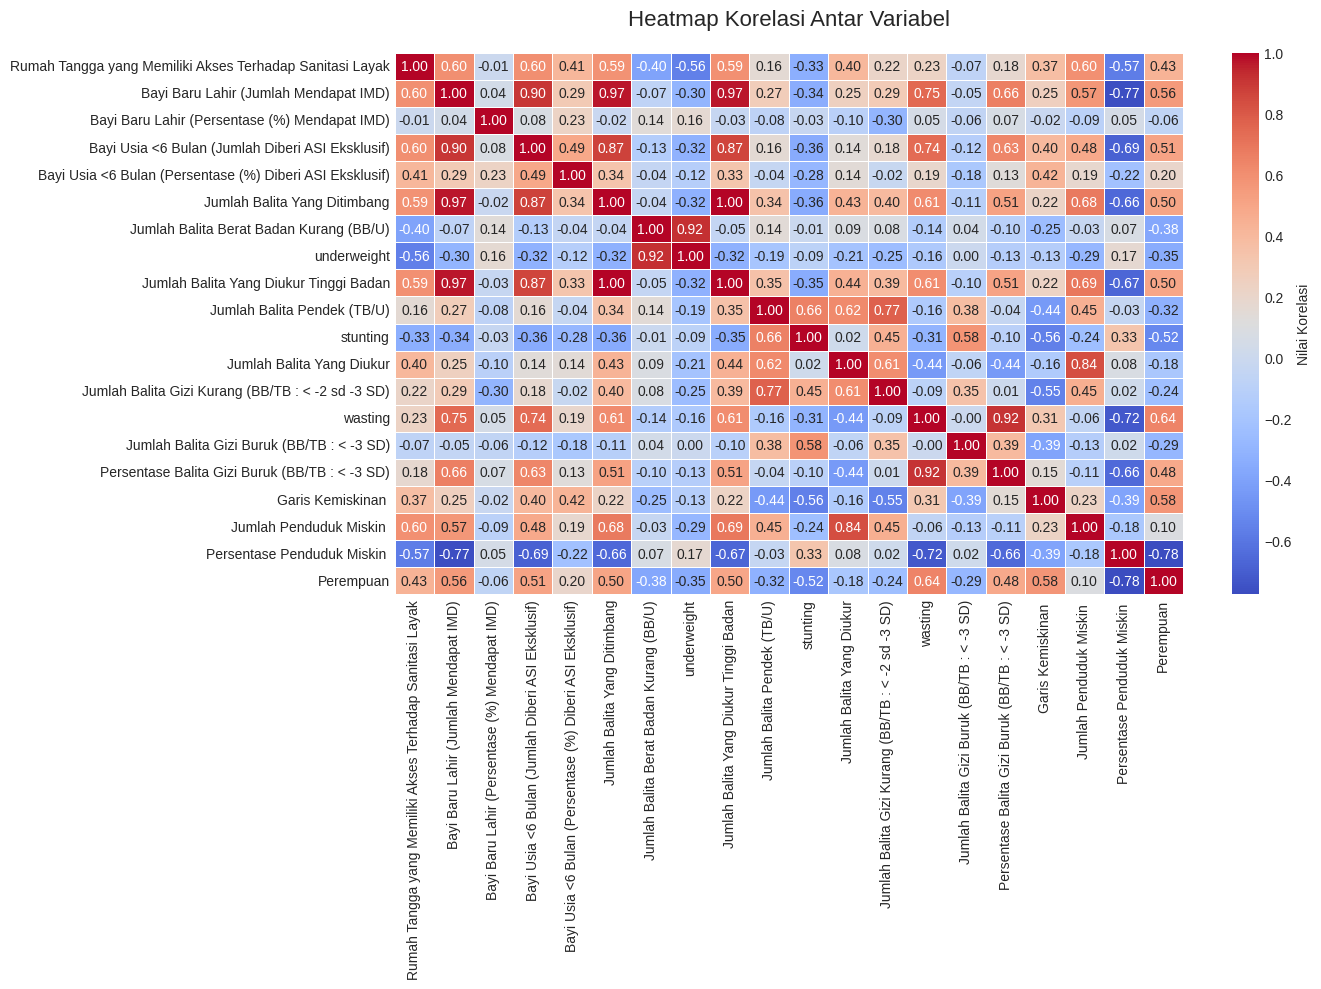

In [165]:
df_corr = df_merged.copy()

df_corr_numeric = df_corr.select_dtypes(include=[np.number])

if df_corr_numeric.empty:
    print("Tidak ada kolom numerik yang bisa dihitung korelasinya!")
else:
    corr_matrix = df_corr_numeric.corr()

    plt.figure(figsize=(14, 10))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={'label': 'Nilai Korelasi'}
    )
    plt.title("Heatmap Korelasi Antar Variabel", fontsize=16, pad=20)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# korelasi dengan target

=== Korelasi Setiap Fitur terhadap Stunting ===
stunting                                                    1.000000
Jumlah Balita Pendek (TB/U)                                 0.657473
Jumlah Balita Gizi Buruk (BB/TB : < -3 SD)                  0.580139
Jumlah Balita Gizi Kurang (BB/TB : < -2 sd -3 SD)           0.448664
Persentase Penduduk Miskin                                  0.328309
Jumlah Balita Yang Diukur                                   0.021554
Jumlah Balita Berat Badan Kurang (BB/U)                    -0.006287
Bayi Baru Lahir (Persentase (%) Mendapat IMD)              -0.030190
underweight                                                -0.088021
Persentase Balita Gizi Buruk (BB/TB : < -3 SD)             -0.098395
Jumlah Penduduk Miskin                                     -0.239469
Bayi Usia <6 Bulan (Persentase (%) Diberi ASI Eksklusif)   -0.284073
wasting                                                    -0.308084
Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Laya

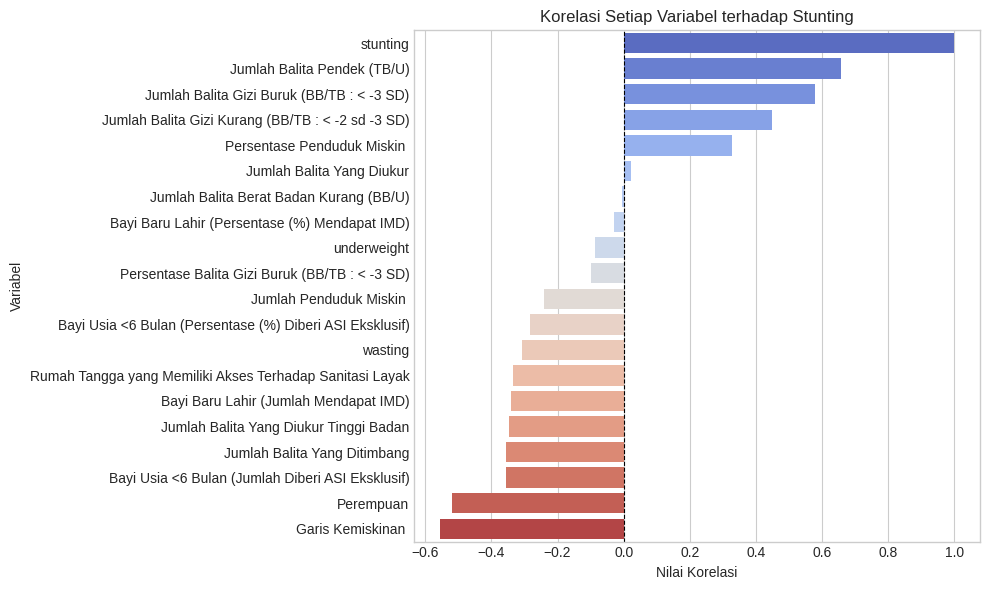

In [166]:
df_corr_numeric = df_merged.select_dtypes(include=[np.number])

corr_target = df_corr_numeric.corr()['stunting'].sort_values(ascending=False)

print("=== Korelasi Setiap Fitur terhadap Stunting ===")
print(corr_target)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index,
    palette='coolwarm'
)
plt.title('Korelasi Setiap Variabel terhadap Stunting')
plt.xlabel('Nilai Korelasi')
plt.ylabel('Variabel')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


# Pemilihan Fitur

Fitur Terpilih Berdasarkan Korelasi terhadap Stunting
['Jumlah Balita Pendek (TB/U)', 'Jumlah Balita Gizi Buruk (BB/TB : < -3 SD)', 'Jumlah Balita Gizi Kurang (BB/TB : < -2 sd -3 SD)', 'Persentase Penduduk Miskin ', 'wasting', 'Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak', 'Bayi Baru Lahir (Jumlah Mendapat IMD)', 'Jumlah Balita Yang Diukur Tinggi Badan', 'Jumlah Balita Yang Ditimbang', 'Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif)', 'Perempuan', 'Garis Kemiskinan ']


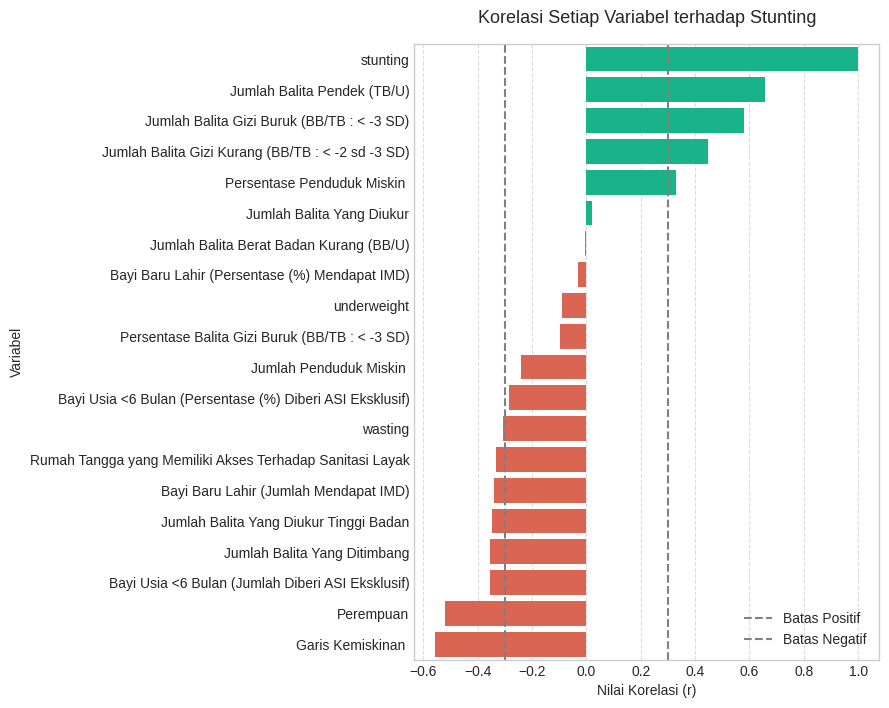


 Dataset hasil feature selection memiliki 12 fitur prediktor.


,Kabupaten_Kota,stunting,Jumlah Balita Pendek (TB/U),Jumlah Balita Gizi Buruk (BB/TB : < -3 SD),Jumlah Balita Gizi Kurang (BB/TB : < -2 sd -3 SD),Persentase Penduduk Miskin,wasting,Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak,Bayi Baru Lahir (Jumlah Mendapat IMD),Jumlah Balita Yang Diukur Tinggi Badan,Jumlah Balita Yang Ditimbang,Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif),Perempuan,Garis Kemiskinan
0,BAU BAU,96,849,13,329,7.40,37,96.99,2077,8879,8879,647,10.88,431717
1,BOMBANA,204,1827,270,542,10.54,61,86.24,2025,8943,8373,661,8.03,423183
2,BUTON,213,2094,101,891,13.99,91,80.33,1734,9822,9822,626,7.94,313831
3,BUTON SELATAN,177,1274,390,563,14.28,78,83.70,1631,7123,7213,618,7.31,300991
4,BUTON TENGAH,144,1400,10,525,14.40,54,85.49,2085,9726,9726,742,6.37,310721


In [167]:
df_corr = df_merged.copy()

df_corr_numeric = df_corr.select_dtypes(include=[np.number])

if 'stunting' not in df_corr_numeric.columns:
    print(" Kolom 'stunting' tidak ditemukan di dataset numerik!")
else:
    corr_matrix = df_corr_numeric.corr()

    corr_with_stunting = corr_matrix['stunting'].sort_values(ascending=False)

    threshold = 0.3

    selected_features = corr_with_stunting[abs(corr_with_stunting) >= threshold].index.tolist()

    selected_features = [f for f in selected_features if f != 'stunting']

    print("Fitur Terpilih Berdasarkan Korelasi terhadap Stunting")
    print(selected_features)

    plt.figure(figsize=(6, len(corr_with_stunting) * 0.4))
    sns.barplot(
        x=corr_with_stunting.values,
        y=corr_with_stunting.index,
        palette=["#EF553B" if val < 0 else "#00CC96" for val in corr_with_stunting.values]
    )
    plt.axvline(x=threshold, color='gray', linestyle='--', label='Batas Positif')
    plt.axvline(x=-threshold, color='gray', linestyle='--', label='Batas Negatif')
    plt.title("Korelasi Setiap Variabel terhadap Stunting", fontsize=13, pad=15)
    plt.xlabel("Nilai Korelasi (r)")
    plt.ylabel("Variabel")
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    df_selected = df_corr[['Kabupaten_Kota', 'stunting'] + selected_features]
    print(f"\n Dataset hasil feature selection memiliki {df_selected.shape[1]-2} fitur prediktor.")

    display(df_selected.head())


In [168]:
df_selected.to_csv("data_cleaned.csv", index=False)

# **Visualisasi & EDA**

1. Bagaimana pengaruh tingkat akses terhadap sanitasi layak terhadap prevalensi stunting pada balita di setiap kabupaten/kota di Provinsi Sulawesi Tenggara?

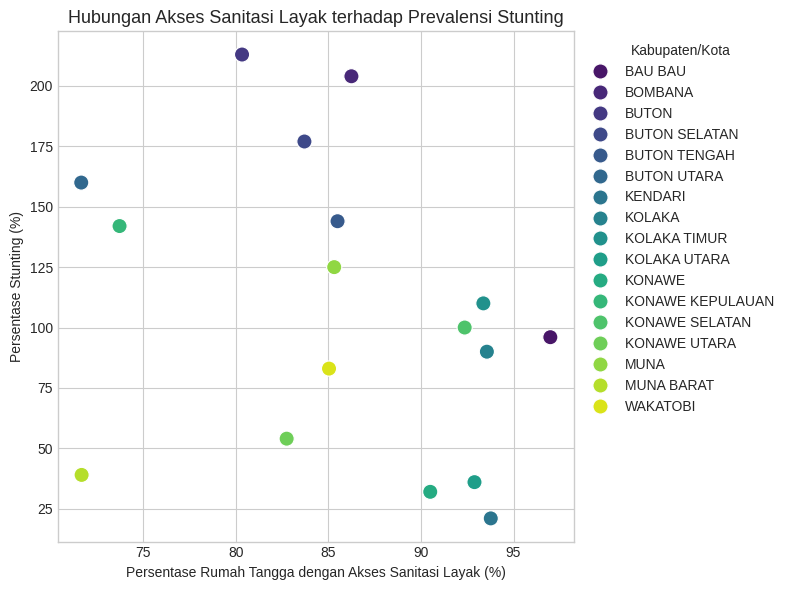

In [169]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_selected,
    x='Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak',
    y='stunting',
    hue='Kabupaten_Kota',
    palette='viridis',
    s=120
)
plt.title('Hubungan Akses Sanitasi Layak terhadap Prevalensi Stunting', fontsize=13)
plt.xlabel('Persentase Rumah Tangga dengan Akses Sanitasi Layak (%)')
plt.ylabel('Persentase Stunting (%)')
plt.legend(bbox_to_anchor=(1,1), title='Kabupaten/Kota')
plt.tight_layout()
plt.show()

2. Bagaimana hubungan antara persentase bayi baru lahir yang mendapatkan ASI eksklusif dengan penurunan prevalensi stunting di kabupaten/kota di Provinsi Sulawesi Tenggara?

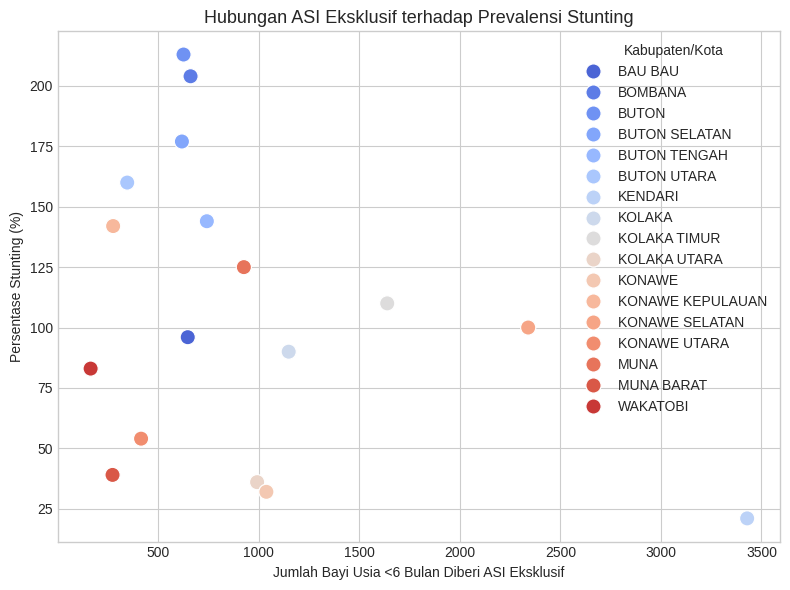

In [170]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_selected,
    x='Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif)',
    y='stunting',
    hue='Kabupaten_Kota',
    palette='coolwarm',
    s=120
)
plt.title('Hubungan ASI Eksklusif terhadap Prevalensi Stunting', fontsize=13)
plt.xlabel('Jumlah Bayi Usia <6 Bulan Diberi ASI Eksklusif')
plt.ylabel('Persentase Stunting (%)')
plt.legend(bbox_to_anchor=(1,1), title='Kabupaten/Kota')
plt.tight_layout()
plt.show()


3.Bagaimana pengaruh tingkat kemiskinan terhadap prevalensi stunting di kabupaten/kota di Provinsi Sulawesi Tenggara?

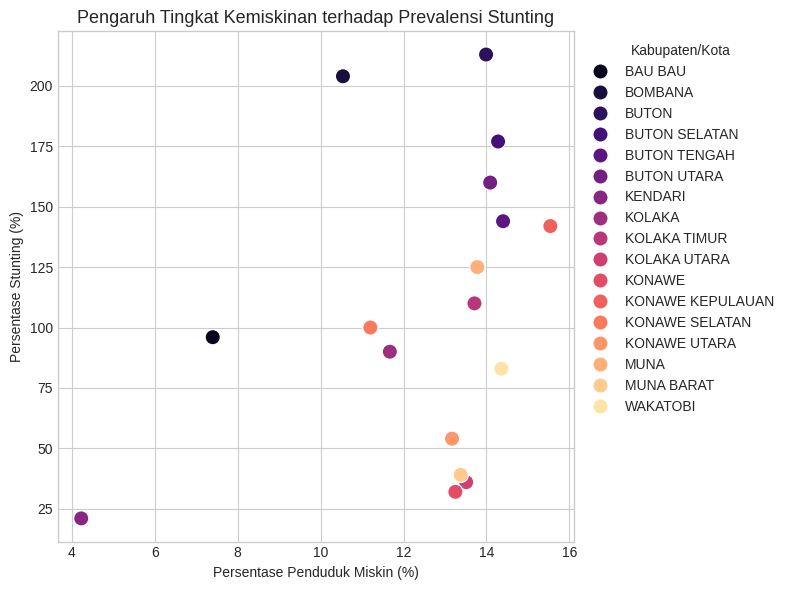

In [171]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_selected,
    x='Persentase Penduduk Miskin ',
    y='stunting',
    hue='Kabupaten_Kota',
    palette='magma',
    s=120
)
plt.title('Pengaruh Tingkat Kemiskinan terhadap Prevalensi Stunting', fontsize=13)
plt.xlabel('Persentase Penduduk Miskin (%)')
plt.ylabel('Persentase Stunting (%)')
plt.legend(bbox_to_anchor=(1,1), title='Kabupaten/Kota')
plt.tight_layout()
plt.show()


4. Bagaimana hubungan antara rata-rata lama sekolah sebagai indikator pendidikan dengan tingkat stunting pada balita di Provinsi Sulawesi Tenggara?

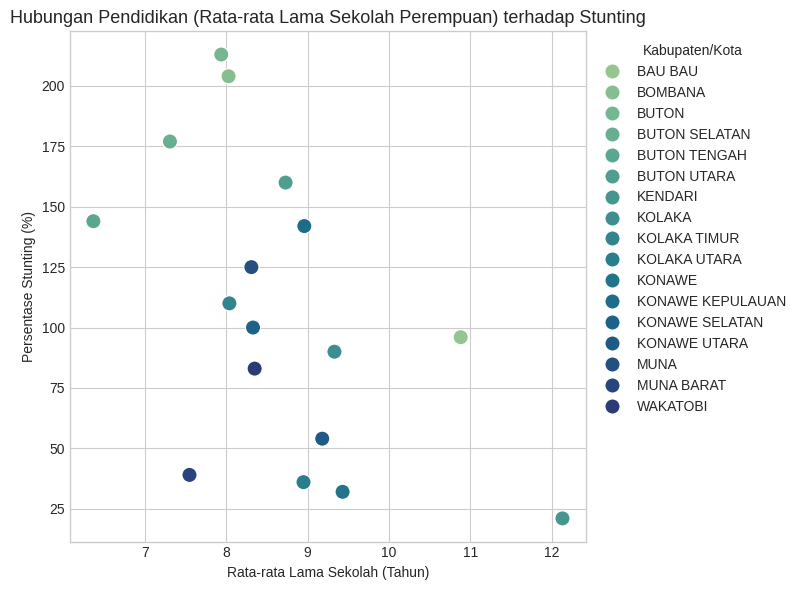

In [172]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_selected,
    x='Perempuan',
    y='stunting',
    hue='Kabupaten_Kota',
    palette='crest',
    s=120
)
plt.title('Hubungan Pendidikan (Rata-rata Lama Sekolah Perempuan) terhadap Stunting', fontsize=13)
plt.xlabel('Rata-rata Lama Sekolah (Tahun)')
plt.ylabel('Persentase Stunting (%)')
plt.legend(bbox_to_anchor=(1,1), title='Kabupaten/Kota')
plt.tight_layout()
plt.show()


5. Bagaimana sebaran data dan hubungan antar indikator gizi, sanitasi, dan sosial ekonomi terhadap kejadian stunting di wilayah Sulawesi Tenggara?

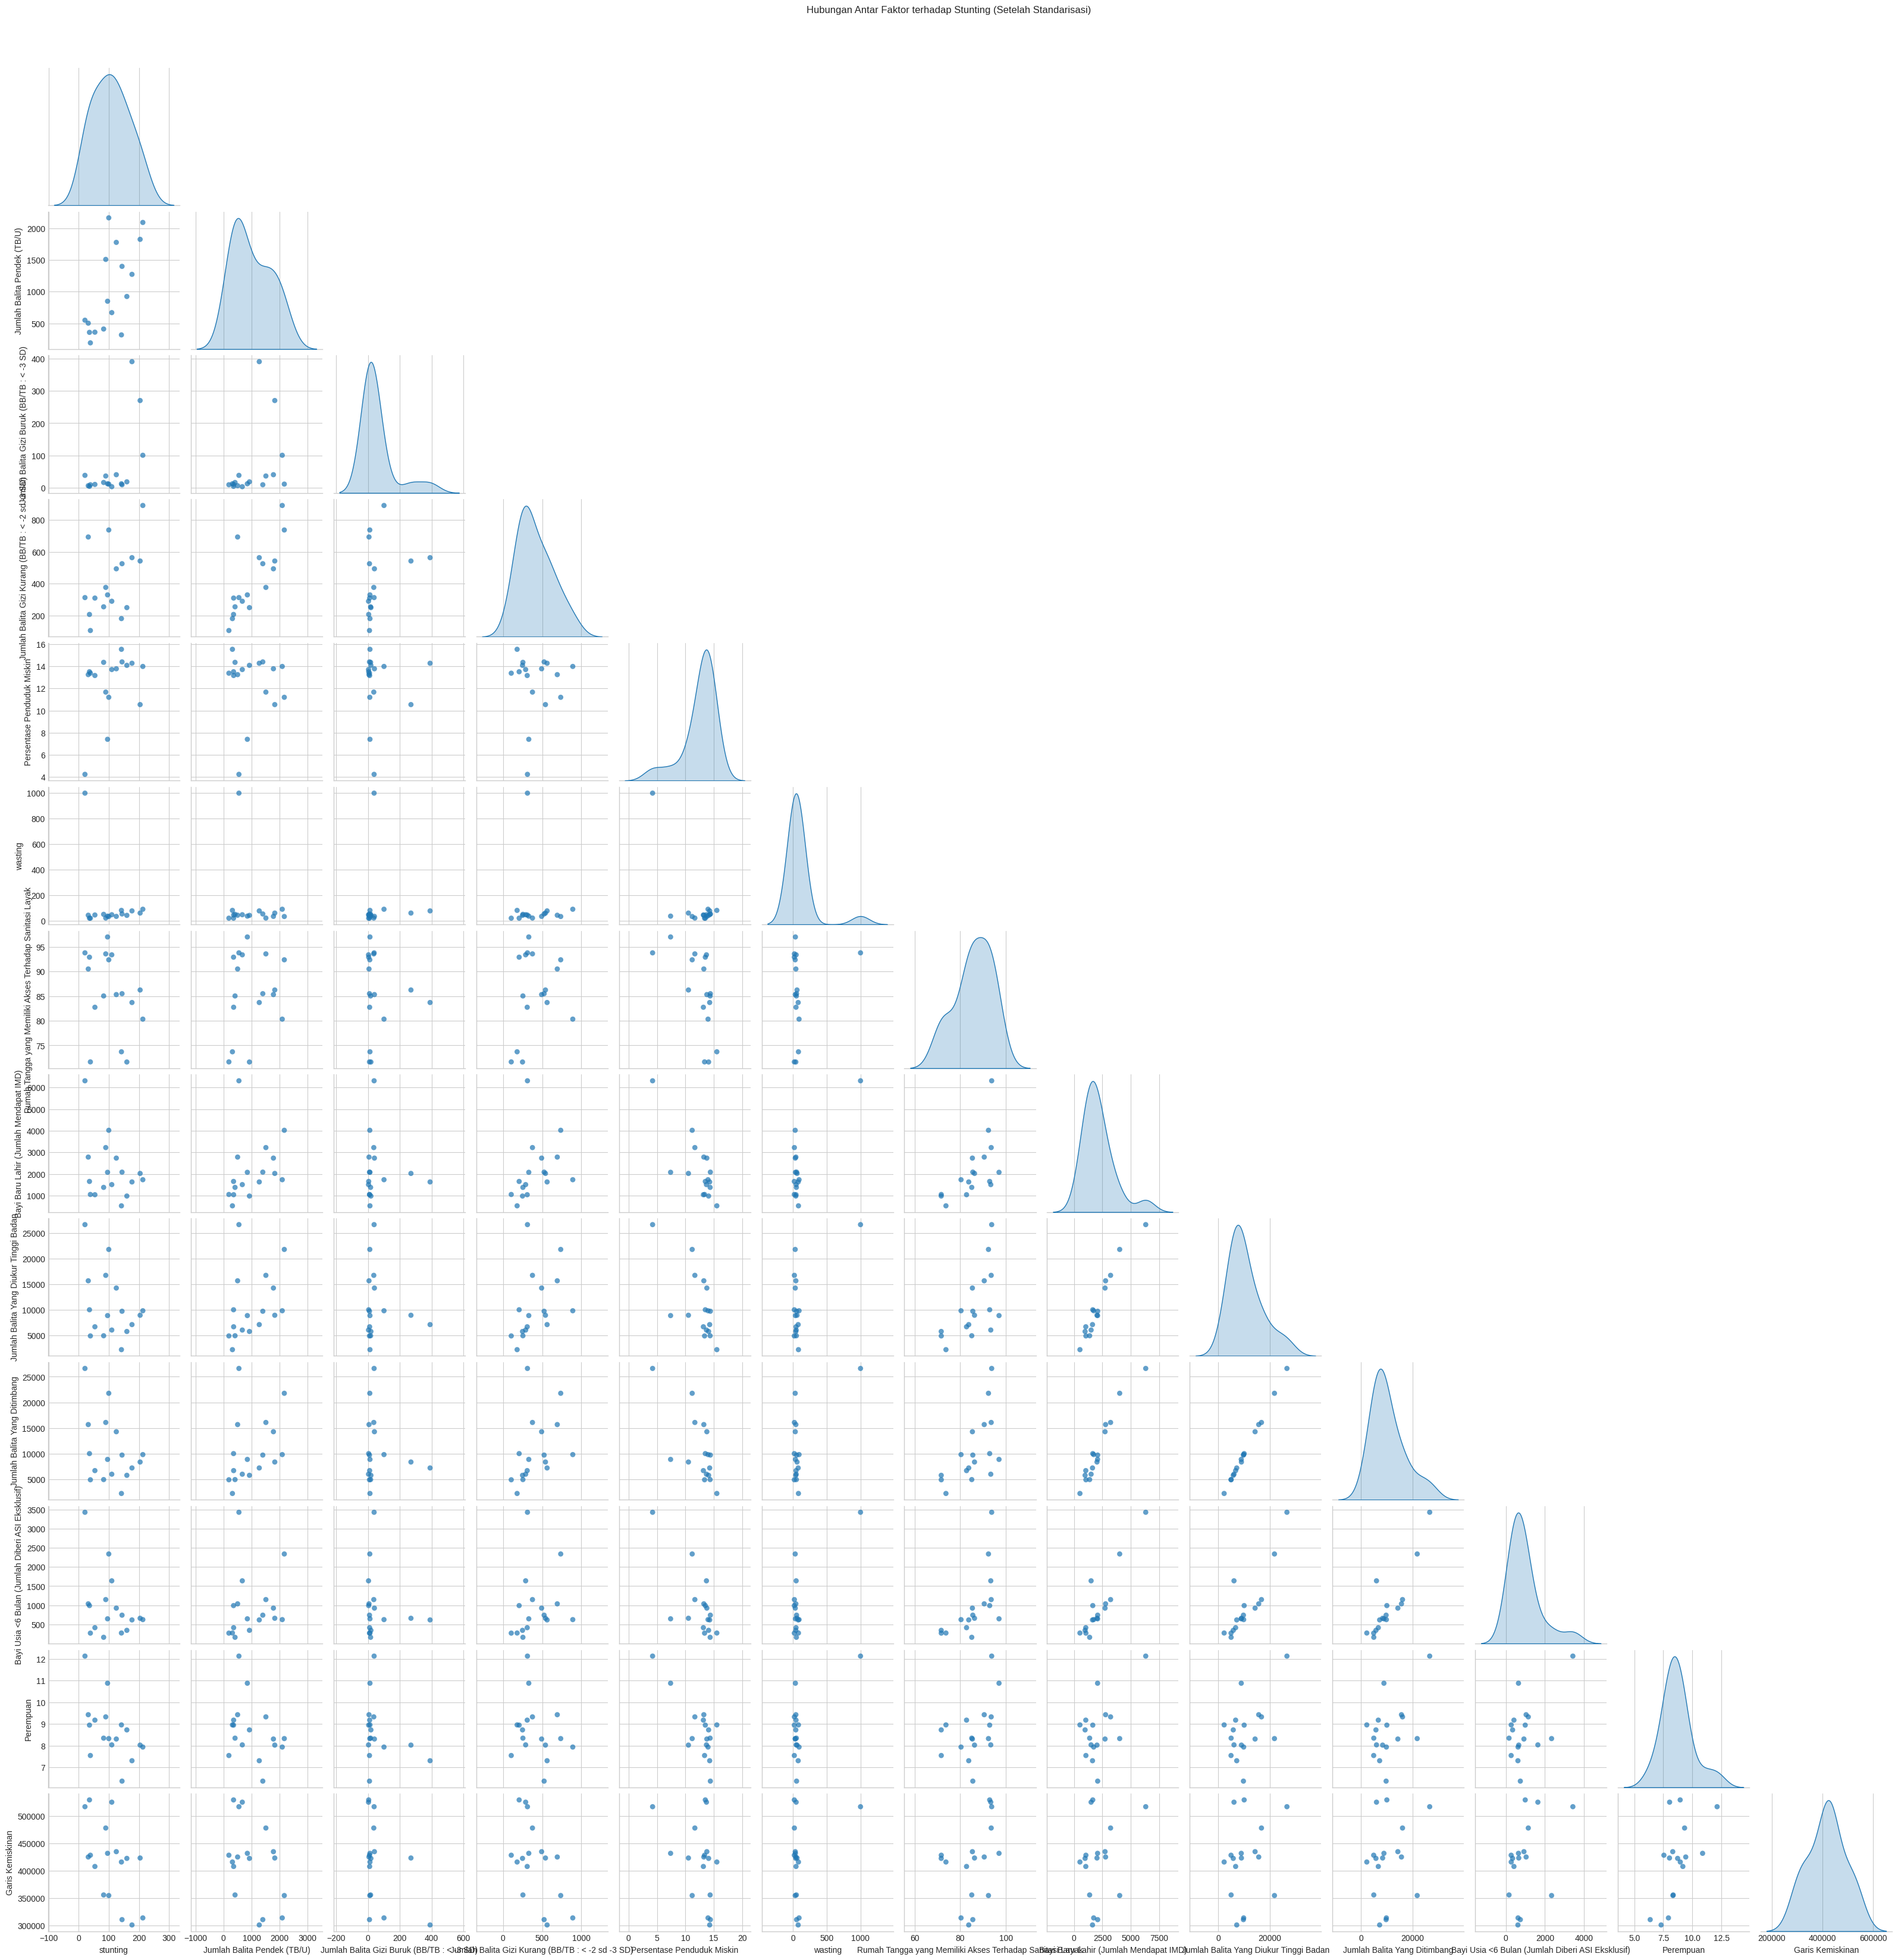

In [173]:
df_selected.columns = df_selected.columns.str.strip()

selected_features_fixed = []
for col in selected_features:
    match = difflib.get_close_matches(col, df_selected.columns, n=1, cutoff=0.6)
    if match:
        selected_features_fixed.append(match[0])
    else:
        print(f"Kolom '{col}' tidak ditemukan di dataframe.")

sns.pairplot(
    df_selected[['stunting'] + selected_features_fixed],
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha':0.7, 's':40, 'edgecolor':'none'}
)
plt.suptitle("Hubungan Antar Faktor terhadap Stunting (Setelah Standarisasi)", y=1.02)
plt.show()

# Standarisasi

In [174]:
df_selected.columns = df_selected.columns.str.strip()

selected_features = [
    'Jumlah Balita Pendek (TB/U)',
    'Jumlah Balita Gizi Buruk (BB/TB : < -3 SD)',
    'Jumlah Balita Gizi Kurang (BB/TB : < -2 sd -3 SD)',
    'Persentase Penduduk Miskin',
    'wasting',
    'Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak',
    'Bayi Baru Lahir (Jumlah Mendapat IMD)',
    'Jumlah Balita Yang Diukur Tinggi Badan',
    'Jumlah Balita Yang Ditimbang',
    'Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif)',
    'Perempuan',
    'Garis Kemiskinan'
]

X = df_selected[selected_features]
y = df_selected['stunting']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=selected_features)
df_scaled.insert(0, 'Kabupaten_Kota', df_selected['Kabupaten_Kota'])
df_scaled['stunting'] = y.values

print("Data setelah standarisasi:")
display(df_scaled.head())


Data setelah standarisasi:


,Kabupaten_Kota,Jumlah Balita Pendek (TB/U),Jumlah Balita Gizi Buruk (BB/TB : < -3 SD),Jumlah Balita Gizi Kurang (BB/TB : < -2 sd -3 SD),Persentase Penduduk Miskin,wasting,Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak,Bayi Baru Lahir (Jumlah Mendapat IMD),Jumlah Balita Yang Diukur Tinggi Badan,Jumlah Balita Yang Ditimbang,Bayi Usia <6 Bulan (Jumlah Diberi ASI Eksklusif),Perempuan,Garis Kemiskinan,stunting
0,BAU BAU,-0.247784,-0.441564,-0.406482,-1.838899,-0.297925,1.444309,-0.063212,-0.273727,-0.263907,-0.382518,1.691314,0.224801,96
1,BOMBANA,1.252457,2.038120,0.601649,-0.706714,-0.191205,0.051740,-0.101802,-0.263538,-0.344766,-0.365282,-0.515045,0.101804,204
2,BUTON,1.662031,0.407511,2.253469,0.537247,-0.057806,-0.713849,-0.317760,-0.123603,-0.113214,-0.408371,-0.584719,-1.474237,213
3,BUTON SELATAN,0.404161,3.195949,0.701042,0.641812,-0.115613,-0.277295,-0.394199,-0.553279,-0.530136,-0.418220,-1.072441,-1.659295,177
4,BUTON TENGAH,0.597443,-0.470510,0.521188,0.685080,-0.222332,-0.045416,-0.057275,-0.138886,-0.128555,-0.265561,-1.800152,-1.519060,144


# **Model dan Evaluasi**

In [175]:
X = df_scaled[selected_features]
y = df_scaled['stunting']

threshold = y.median()
y_class = np.where(y > threshold, "Tinggi", "Rendah")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.3, random_state=42, stratify=y_class
)


 Classification Report (KNN)
              precision    recall  f1-score   support

      Rendah       0.75      1.00      0.86         3
      Tinggi       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



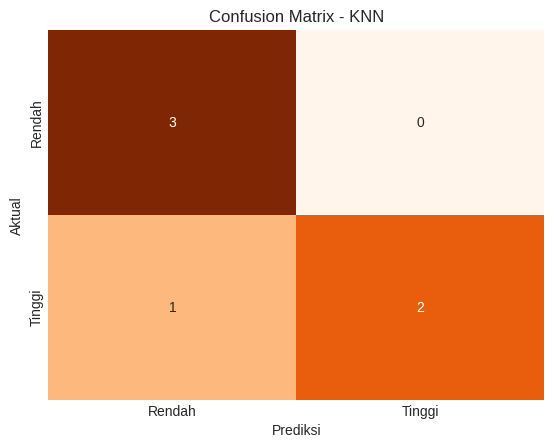

 Akurasi Model KNN: 83.33%


In [176]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("\n Classification Report (KNN)")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=["Rendah", "Tinggi"], yticklabels=["Rendah", "Tinggi"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

acc_knn = accuracy_score(y_test, y_pred)
print(f" Akurasi Model KNN: {acc_knn:.2%}")


# **Conclusion**

- Stunting di Sulawesi Tenggara dipengaruhi secara kuat oleh faktor pendidikan, kemiskinan, sanitasi, dan pola pemberian ASI.

- Kabupaten Buton dan Bombana memerlukan perhatian khusus karena memiliki tingkat stunting yang paling tinggi.

- Upaya penurunan stunting perlu dilakukan secara multisektoral, mencakup:

- Peningkatan pendidikan perempuan,

- Pengentasan kemiskinan,

- Peningkatan akses sanitasi dan air bersih,

- Peningkatan promosi dan dukungan terhadap ASI eksklusif.

# **Development**

In [178]:
joblib.dump(knn_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

files.download("model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>